<a href="https://colab.research.google.com/github/nishantbundela/data_science_projects/blob/master/Spotify_global_top_500_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary libraries

In this section, we import the necessary libraries required for our analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
from skimage.feature import hog
from skimage import exposure
import matplotlib.dates as mdates

## Loading and Exploring the data
In this section, we load the dataset into our notebook. We use pandas to read the csv file and store it in a dataframe named df.

In [ ]:
df = pd.read_csv("playlist.csv")

In [ ]:
df.head(5)

,track_name,track_add_date,track_add_time,multiple_artists_bool,name_of_artists,album_name,album_release_date,album_release_date_precision,number_of_tracks_in_album,position_in_playlist,track_duration_ms,track_popularity,track_explicit,images_path,data_collection_date
0,Flowers,2023-03-31,10:02:16,False,['Miley Cyrus'],Endless Summer Vacation,2023-03-10,day,13,1,200600,87,False,./images/flowers_miley_cyrus.jpg,2023-03-31
1,Kill Bill,2023-03-31,10:02:16,False,['SZA'],SOS,2022-12-08,day,23,2,153946,94,False,./images/kill_bill_sza.jpg,2023-03-31
2,TQG,2023-03-31,10:02:16,True,"['KAROL G', 'Shakira']",MAÑANA SERÁ BONITO,2023-02-24,day,17,3,197933,97,True,./images/tqg_karol_g.jpg,2023-03-31
3,BESO,2023-03-31,10:02:16,True,"['ROSALÍA', 'Rauw Alejandro']",RR,2023-03-24,day,3,4,194543,87,False,./images/beso_rosala.jpg,2023-03-31
4,Boy's a liar Pt. 2,2023-03-31,10:02:16,True,"['PinkPantheress', 'Ice Spice']",Boy's a liar Pt. 2,2023-02-03,day,2,5,131013,97,False,./images/boys_a_liar_pt_2_pinkpantheress.jpg,2023-03-31


## Verifying the shape of the data and the content type in each column


In [ ]:
# Check the shape and data types of the dataframe
print("Shape of dataframe:", df.shape)
print("\nData types of columns:\n")
df.dtypes

Shape of dataframe: (500, 15)

Data types of columns:



track_name                      object
track_add_date                  object
track_add_time                  object
multiple_artists_bool             bool
name_of_artists                 object
album_name                      object
album_release_date              object
album_release_date_precision    object
number_of_tracks_in_album        int64
position_in_playlist             int64
track_duration_ms                int64
track_popularity                 int64
track_explicit                    bool
images_path                     object
data_collection_date            object
dtype: object

In [ ]:
# Check for missing values
print("\nNumber of missing values in each column:\n", df.isnull().sum())


Number of missing values in each column:
 track_name                      0
track_add_date                  0
track_add_time                  0
multiple_artists_bool           0
name_of_artists                 0
album_name                      0
album_release_date              0
album_release_date_precision    0
number_of_tracks_in_album       0
position_in_playlist            0
track_duration_ms               0
track_popularity                0
track_explicit                  0
images_path                     0
data_collection_date            0
dtype: int64


In [ ]:
# Basic summary statistics
df.describe()

,number_of_tracks_in_album,position_in_playlist,track_duration_ms,track_popularity
count,500.000000,500.000000,500.000000,500.000000
mean,9.944000,25.500000,196816.488000,87.004000
std,8.904124,14.445322,35540.137079,13.082748
min,1.000000,1.000000,112087.000000,0.000000
25%,1.000000,13.000000,167303.000000,87.000000
50%,10.000000,25.500000,197933.000000,90.000000
75%,17.000000,38.000000,221435.250000,93.000000
max,36.000000,50.000000,272373.000000,98.000000


## Data Visualizations

#### Distribution of track popularity

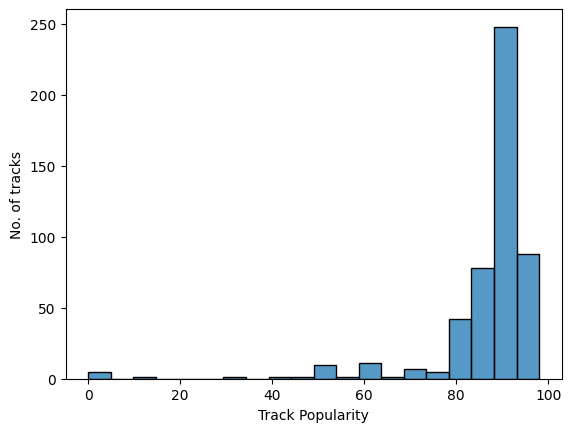

In [ ]:
# Distribution of track popularity
sns.histplot(data=df, x=df.track_popularity, bins=20)
plt.xlabel("Track Popularity")
plt.ylabel("No. of tracks")
plt.show()

#### Distribution of track duration

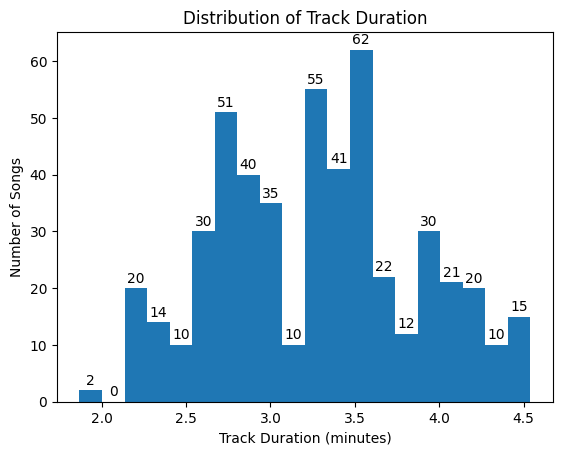

In [ ]:
# Plot a histogram of the track duration

# Create a histogram with 20 bins
n, bins, patches = plt.hist(df['track_duration_ms']/60000, bins=20)

# Add text labels above each bar
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width()/2.0, 
             patches[i].get_height() + 1, 
             int(n[i]), ha='center')
plt.xlabel('Track Duration (minutes)')
plt.ylabel('Number of Songs')
plt.title('Distribution of Track Duration')
plt.show()

#### Track popularity vs. position in playlist

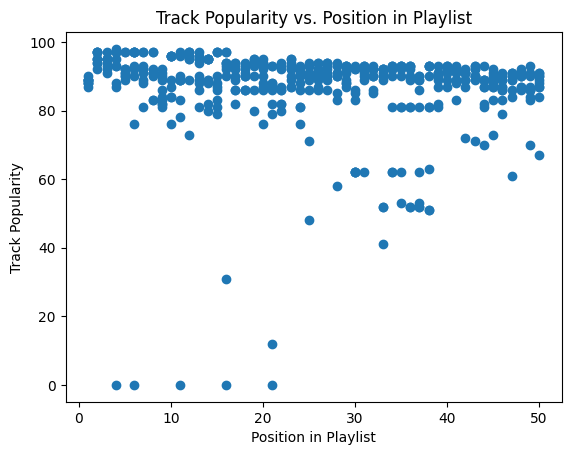

In [ ]:
# Plot a scatterplot of track popularity vs. position in playlist
plt.scatter(df['position_in_playlist'], df['track_popularity'])
plt.xlabel('Position in Playlist')
plt.ylabel('Track Popularity')
plt.title('Track Popularity vs. Position in Playlist')
plt.show()

#### Relation between track duration and popularity

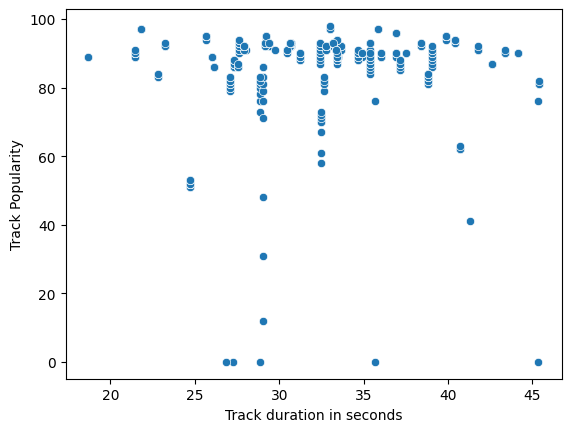

In [ ]:
# Scatter plot of track duration vs. popularity
sns.scatterplot(data=df, x=(df.track_duration_ms)/6000, y=df.track_popularity)
plt.xlabel("Track duration in seconds")
plt.ylabel("Track Popularity")
plt.show()

#### Distribution of number of tracks in album

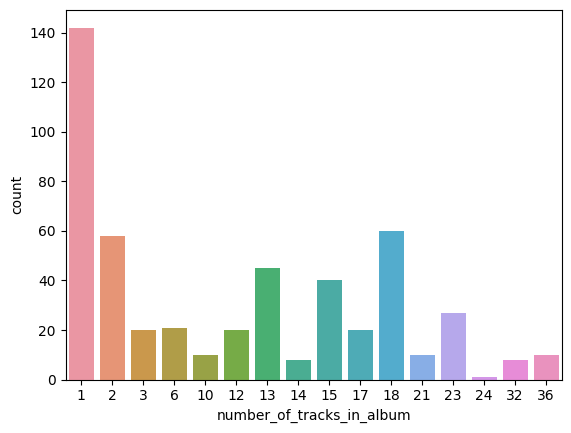

In [ ]:
# Bar chart of number of tracks per album
sns.countplot(data=df, x="number_of_tracks_in_album")
plt.show()

#### Boxplotting duration of songs

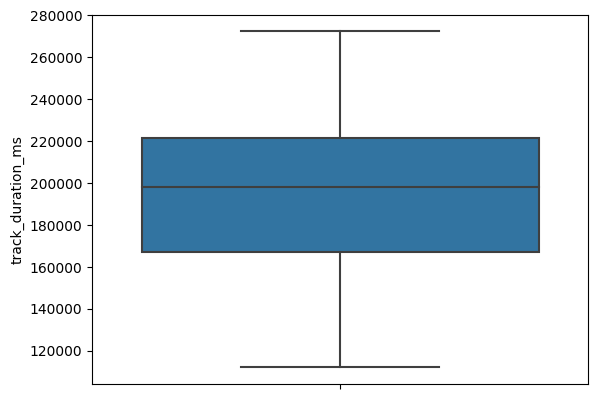

In [ ]:
# Boxplot of track durations
sns.boxplot(data=df, y="track_duration_ms")
plt.show()

#### Pie chart of explicit vs. non-explicit tracks

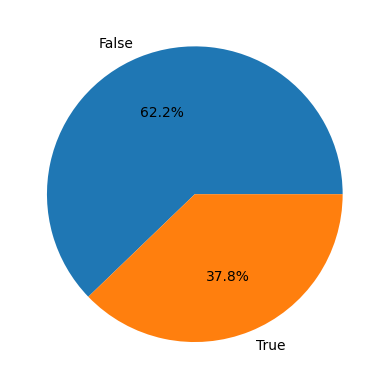

In [ ]:

explicit_counts = df["track_explicit"].value_counts()
plt.pie(explicit_counts, labels=explicit_counts.index, autopct="%1.1f%%")
plt.show()

#### Grouped bar chart of track popularity by explicitness

<ipython-input-23-8680764b7f99>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  popularity_by_explicit = df.groupby("track_explicit").mean()["track_popularity"]


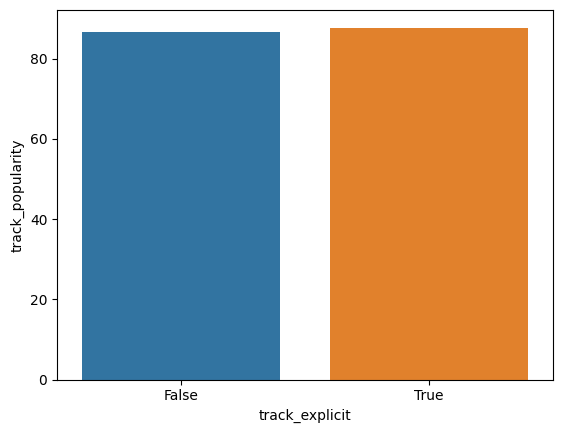

In [ ]:

popularity_by_explicit = df.groupby("track_explicit").mean()["track_popularity"]
sns.barplot(x=popularity_by_explicit.index, y=popularity_by_explicit, data=df)
plt.show()

## Correlations

In [ ]:
# Calculate the correlation matrix for the dataset
corr = df.corr()
print("\nCorrelation Matrix:\n")
corr


Correlation Matrix:



<ipython-input-24-d8effbb97663>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,multiple_artists_bool,number_of_tracks_in_album,position_in_playlist,track_duration_ms,track_popularity,track_explicit
multiple_artists_bool,1.000000,-0.244118,-0.197785,0.100238,0.257711,0.300017
number_of_tracks_in_album,-0.244118,1.000000,0.040618,0.067167,-0.034318,0.152826
position_in_playlist,-0.197785,0.040618,1.000000,0.026102,-0.090421,0.131335
track_duration_ms,0.100238,0.067167,0.026102,1.000000,0.010336,0.230706
track_popularity,0.257711,-0.034318,-0.090421,0.010336,1.000000,0.043313
track_explicit,0.300017,0.152826,0.131335,0.230706,0.043313,1.000000


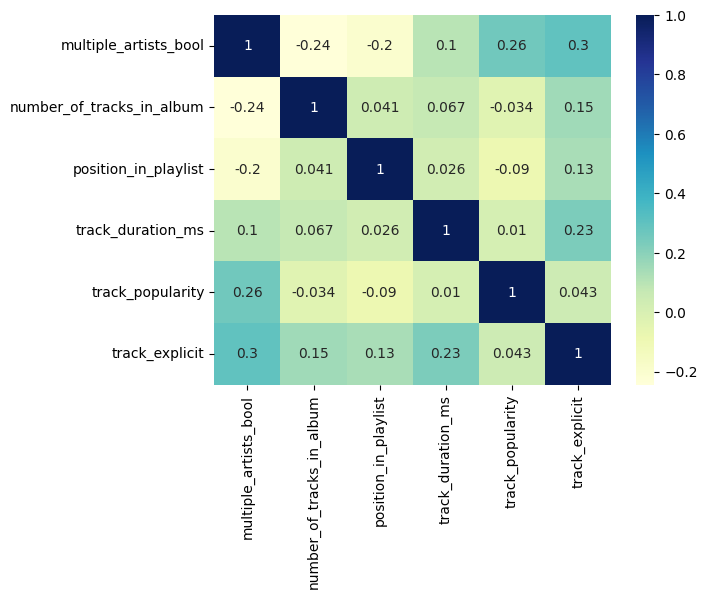

In [ ]:
# for better visuallization of correlation

sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()